### step function
- 계단 함수(Step Function)는 입력이 0을 넘으면 1을 출력하고, 그 외에는 0을 출력하는 함수
- 기본적으로 아래와 같이 작성하면 되나, 아래 코드는 하나의 숫자(스칼라)만 처리 가능

In [1]:
def step_function_basic(x) :
    return 1 if x>0 else 0

numpy 연산을 통해 간단히 배열에 step function을 적용할 수 있다.

In [3]:
import numpy as np

x = np.array([-1,0,1.0,2.0])
y = x>0
print(x, '\n', y)

[-1.  0.  1.  2.] 
 [False False  True  True]


In [4]:
y.astype(int)

array([0, 0, 1, 1])

step function 그래프는 다음과 같다.

In [5]:
def stepfuction(x:np.array) -> np.array:
    y = x > 0
    return y.astype(int)

In [6]:
x = np.arange(-5.0,5.0,0.1)
y = stepfuction(x)

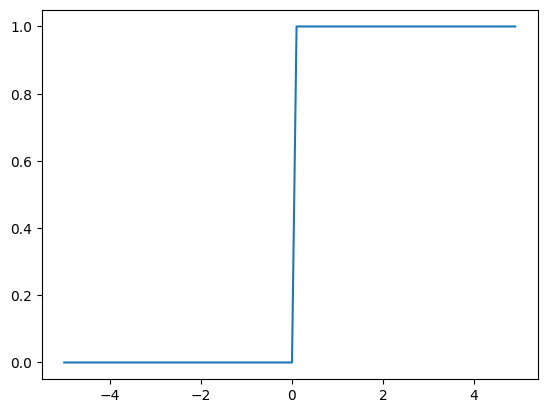

In [8]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()

### sigmoid function
$$h(x) = \frac{1}{1+{e^{-x}}}$$


In [21]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [23]:
x = np.arange(-2.0,2.1,0.5)
y = sigmoid(x)
print(x)
print(np.round(y,3))

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
[0.119 0.182 0.269 0.378 0.5   0.622 0.731 0.818 0.881]


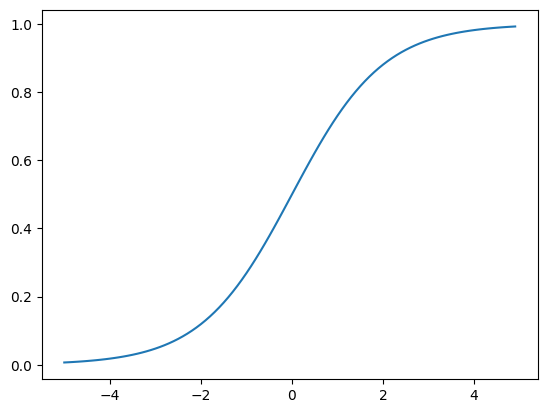

In [26]:
import matplotlib.pyplot as plt
x = np.arange(-5.0,5,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.show()

### Hyperbolic Tangent Function
$$h(x) = \frac{1-e^{-x}}{1+e^{-x}} = 2*sigmoid(2x)-1$$
`[-1,1]`의 범위.
시그모이드가 항상 양사문을 출력하는 문제를 해결하고자 도입.

그러나 시그모이드와 마찬가지로 연산에 많은 시간이 조요되고, 그레디언트 포화가 발생하는 문제가 있다.


In [27]:
def tanh(x):
    return (1-np.exp(-x))/(1+np.exp(-x))

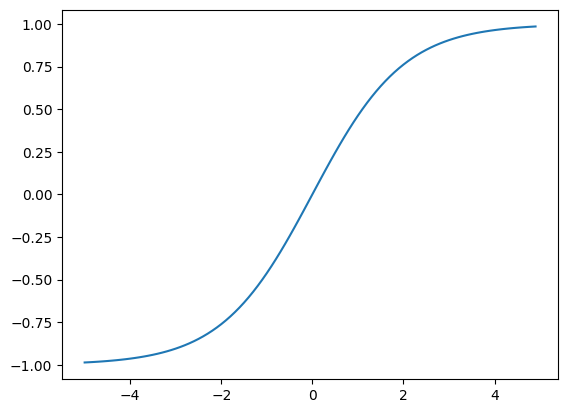

In [28]:
x = np.arange(-5.0,5,0.1)
y = tanh(x)
plt.plot(x,y)
plt.show()

### ReLU, Rectified Linear Unit
ReLu는 입력이 0을 넘으면 그대로, 0을 넘지 않으면 0을 출력한다. (반도체처럼)
$$h(x) = \begin{cases} x & (x>0) \\ 0 & (x\leq0) \end{cases}$$
2010년, Geoffrey Hinton이 제안했으며, 계산 방식이 단순해 속도가 빠르다.
- 기울기가 폭주할 수 있다는 당초 예상과는 달리 실제 은닉층에서는 가중치가 1을 넘지 않는 경우가 많아 폭주가 잘 일어나지 않았다.
- 또한 sigmoid는 기울기 포화 문제를 발생시키는 것에 비해 ReLU는 유효값에 감쇠를 주지 않기 때문에 깊은 은닉층에서  더 섬세한 근사가 가능했다.
- 하지만 음수 구간이 항상 0이라는 부분에서 학습 중 가중치가 음수가 되면 항상 0으로 출력되는 Dying ReLU 현상이 있다.
	- 죽은 ReLU가 전체 뉴런의 10~20%가 되면 모델 학습이 제대로 이루어지지 않는다.

In [29]:
def relu(x) :
    return np.maximum(0,x)

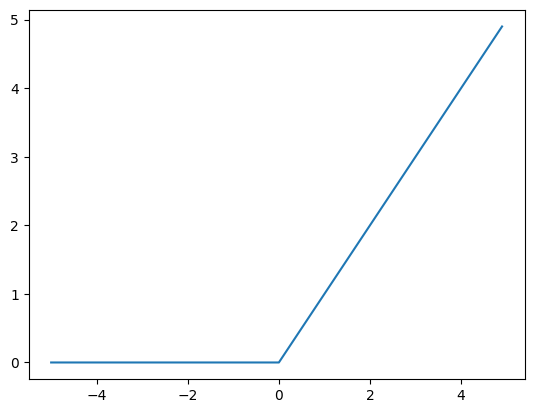

In [30]:
x = np.arange(-5.0,5,0.1)
y = relu(x)
plt.plot(x,y)
plt.show()

### Leaky ReLU
- 일반 ReLU가 음수 구간에서 항상 0이 되는 문제를 해결하기 위해 음수 구간에 낮은 기울기($a$)를 준 함수이다. (dying 방지)
$$h(x) = \begin{cases} x & (x>0) \\ ax & (x\leq0) \end{cases}$$


In [36]:
def leaky_relu(x,a=0.1) :
    return np.maximum(a*x,x)

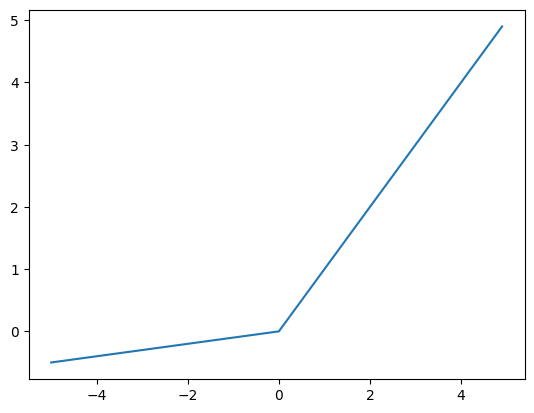

In [33]:
x = np.arange(-5.0,5,0.1)
y = leaky_relu(x)
plt.plot(x,y)
plt.show()

In [40]:
def elu(x,a=1.0) :
    return np.where(x>0, x, a*(np.exp(x)-1))

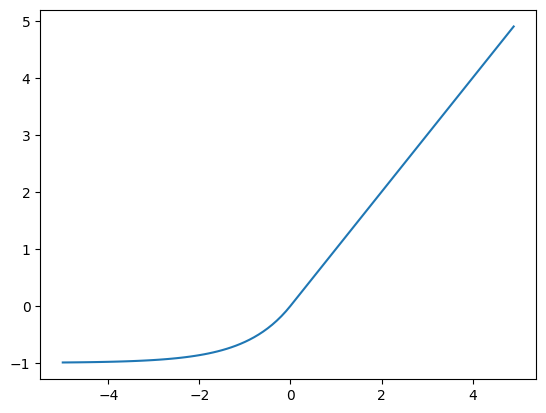

In [41]:
x = np.arange(-5.0,5,0.1)
y = elu(x)
plt.plot(x,y)
plt.show()